<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/salary-prediction-linear-regression/blob/main/Salary_prediction_neural_network_multiple_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
df = pd.read_csv('/content/salary_data.csv')

In [67]:
print(df.shape[0])

30


In [68]:
X = df['YearsExperience']
y = df['Salary']

In [69]:
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [70]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [71]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
# Ensure input is 2D before scaling
if X_train.ndim == 1:
    X_train = X_train.to_numpy().reshape(-1, 1)
    y_train = y_train.to_numpy().reshape(-1, 1)
    X_test = X_test.to_numpy().reshape(-1, 1)
    y_test = y_test.to_numpy().reshape(-1, 1)

# Apply standard scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [110]:
model = Sequential(
    [
        tf.keras.Input(shape=(1,)),
        Dense(64, activation='linear', kernel_regularizer= tf.keras.regularizers.l2(l2=0.01)),
        Dense(1, activation='linear')
    ],
    name='salary_model'
)

In [111]:
model.summary()

Model: "salary_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.1)
)

In [113]:
print(type(X_train))

<class 'numpy.ndarray'>


In [114]:
print(type(X_train))

<class 'numpy.ndarray'>


In [115]:
model.fit(X_train_scaled, y_train_scaled, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step - loss: 0.6378
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.2844
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.7102
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2726
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6152
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3461
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0642
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2569
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2763
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1279
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1325
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1602
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1644
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1940
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1738
Epoch 16/500
1/1 ━

In [116]:
train_pred = model.predict(X_train_scaled)
print(train_pred)
print(y_train_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[ 1.185633  ]
 [ 0.27069354]
 [-0.8521867 ]
 [-1.0185393 ]
 [-2.0998316 ]
 [-0.51948154]
 [ 1.4351618 ]
 [-0.06201173]
 [-1.7255379 ]
 [-2.0166552 ]
 [-0.10359989]
 [ 0.72816324]
 [ 1.726279  ]
 [-1.9334787 ]
 [ 1.8094554 ]
 [ 1.3935739 ]
 [ 1.0608685 ]
 [ 0.395458  ]
 [-1.3512446 ]
 [-0.68583405]
 [-0.35312876]]
[[ 0.86672655]
 [ 0.3744595 ]
 [-0.85787934]
 [-0.85403906]
 [-1.48860983]
 [-0.47182449]
 [ 1.11751819]
 [ 0.45275855]
 [-1.33990564]
 [-1.2446098 ]
 [ 0.00554369]
 [ 0.71453766]
 [ 1.46442351]
 [-1.54592957]
 [ 1.44596883]
 [ 1.27162722]
 [ 1.00358987]
 [ 0.60683202]
 [-0.87348937]
 [-0.71457999]
 [ 0.0668815 ]]


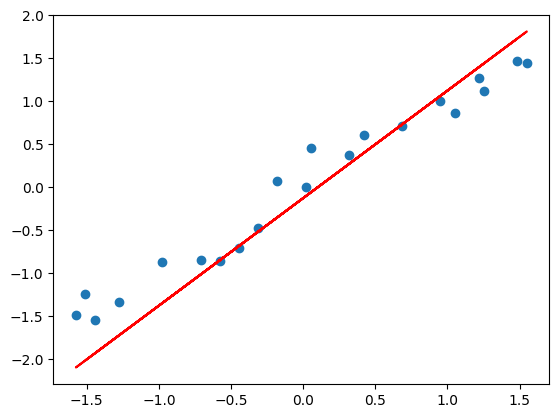

In [117]:
plt.scatter(X_train_scaled, y_train_scaled)
plt.plot(X_train_scaled, train_pred, c='r')
plt.show()

In [118]:
test_pred = model.predict(X_test_scaled)
print(test_pred)
print(y_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[-0.4363052 ]
 [-0.93536294]
 [-1.2264801 ]
 [ 0.8529278 ]
 [-1.6423615 ]
 [-1.3096564 ]
 [-1.2264801 ]
 [-0.89377475]
 [-0.89377475]]
[[-0.53970501]
 [-0.63965897]
 [-0.95161063]
 [ 1.15937013]
 [-1.46912396]
 [-0.74875138]
 [-0.59602912]
 [-0.86228855]
 [-0.90364268]]


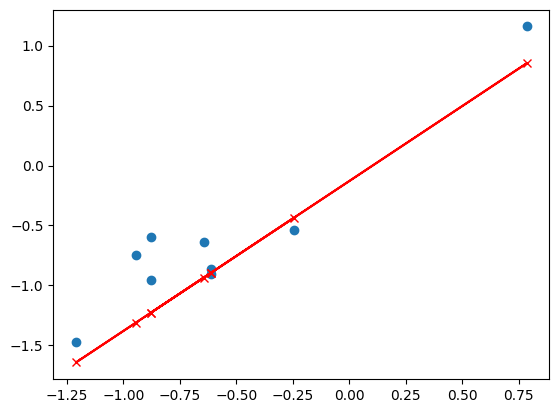

In [119]:
plt.scatter(X_test_scaled, y_test_scaled)
plt.plot(X_test_scaled, test_pred, c='r',marker='x')
plt.show()

In [120]:
print(mean_squared_error(y_train_scaled, train_pred))
print(mean_squared_error(y_test_scaled, test_pred))

0.11701789467417974
0.11230837853635228


In [121]:
print(r2_score(y_train_scaled, train_pred))
print(r2_score(y_test_scaled, test_pred))

0.8829821053258202
0.7570360498414105


In [122]:
[layer1, layer2] = model.layers

In [109]:
print(layer1.get_weights())
print(layer2.get_weights())

[array([[ 0.19411248, -0.20923848,  0.0022321 , -0.00076857, -0.00090374,
        -0.13831683,  0.00465808, -0.00515859,  0.01879682, -0.01207285]],
      dtype=float32), array([-0.01125092,  0.00719894, -0.03001418, -0.05068873,  0.04637507,
        0.02078951, -0.00558452,  0.01288546, -0.00335576,  0.00336265],
      dtype=float32)]
[array([[ 1.9002047e+00],
       [-2.0495732e+00],
       [ 1.7123422e-02],
       [-1.8764338e-03],
       [-7.5332243e-03],
       [-1.3356562e+00],
       [ 1.7524626e-02],
       [-1.6859252e-02],
       [ 4.6060003e-02],
       [-3.6904823e-02]], dtype=float32), array([0.04181613], dtype=float32)]
